YlGnBu-8
8 colors palette
    1. #ffffd9
    2. #edf8b1
    3. #c7e9b4
    4. #7fcdbb
    5. #41b6c4
    6. #1d91c0
    7. #225ea8
    8. #0c2c84

Touch frequency kiss last week
Touch frequency put arm around shoulder last week
Touch frequency intimate hug last week

How often have you and your partner touched each other in this way in the last week?

From Yvonee

Key predictors of higher touch frequency were
1. higher Relationship Satisfaction
2. more positive communication
3. shorter relationship duration
4. the absence of children
5. living together
6. younger age


In [89]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [90]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [91]:
# Variables to map columns
# New values could be assigned as 'in-between' values to ease plotting and calculations
overall_options = {
    'index_options': {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    'omo_options': {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    'satisfaction_options': {
        '0 - Not at all satisfied': 0,
        '1': 2,
        '2': 2,
        '3': 4,
        '4': 4,
        '5': 6,
        '6': 6,
        '7': 8,
        '8': 8,
        '9': 10,
        '10 - Completely satisfied': 10
    },
    'duration_options': {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    },
    'kids_options': {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    },
    'Loneliness_options': {
        '1 - Not at all': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5 - Absolutely': 5
    },
    'cohabitation-options': {
        'Cohabiting': 1,
        'Separate households': 2,
    }
}

In [92]:
rename_columns = {
    'omo15i1_w2b': 'Anchor kiss given',
    'omo15i2_w2b': 'Anchor kiss desired',
    'pomo15i1_w2b': 'Partner kiss given',
    'pomo15i2_w2b': 'Partner kiss desired',
    'omo16i1_w2b': 'Anchor hold given',
    'omo16i2_w2b': 'Anchor hold desired',
    'pomo16i1_w2b': 'Partner hold given',
    'pomo16i2_w2b': 'Partner hold desired',
    'omo17i1_w2b': 'Anchor hug given',
    'omo17i2_w2b': 'Anchor hug desired',
    'pomo17i1_w2b': 'Partner hug given',
    'pomo17i2_w2b': 'Partner hug desired',
    'relsat': 'Anchor Relationship Satisfaction',
    'relint': 'Anchor Communication Quality',
    'lifsat': 'Anchor Life Satisfaction',
    'prelsat': 'Partner Relationship Satisfaction',
    'prelint': 'Partner Communication Quality',
    'plifsat': 'Partner Life Satisfaction',
    'agediff_class': 'Age difference',
    'nkidsliv_class': 'Kids',
    'sex': 'Anchor sex',
    'psex': 'Partner sex',
    'age': 'Anchor Age',
    'page': 'Partner Age',
    'loneliness': 'Anchor Loneliness',
    'ploneliness': 'Partner Loneliness',
    'cohab': 'Cohabitation',
    'confm': 'Anchor conflict management',
    'pconfm': 'Partner conflict management',
    'extr': 'Anchor Extraversion',
    'agree': 'Anchor Agreeableness',
    'consc': 'Anchor Conscientiousness',
    'open': 'Anchor Openess',
    'neur': 'Anchor Neuroticism',
    'pextr': 'Partner Extraversion',
    'pagree': 'Partner Agreeableness',
    'pconsc': 'Partner Conscientiousness',
    'popen': 'Partner Openess',
    'pneur': 'Partner Neuroticism',
}

# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)
df = df.drop([
    'reldur', 'ptf_kiss', 'tf_hold', 'tf_hug', 'ptf_kiss', 'ptf_hold', 'ptf_hug'], axis=1)

"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [93]:
# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor Relationship Satisfaction'] = df['Anchor Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner Relationship Satisfaction'] = df['Partner Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor Life Satisfaction'] = df['Anchor Life Satisfaction'].map(overall_options["satisfaction_options"])
df['Partner Life Satisfaction'] = df['Partner Life Satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor kiss given'] = df['Anchor kiss given'].map(overall_options["omo_options"])
df['Anchor hold given'] = df['Anchor hold given'].map(overall_options["omo_options"])
df['Anchor hug given'] = df['Anchor hug given'].map(overall_options["omo_options"])
df['Anchor kiss desired'] = df['Anchor kiss desired'].map(overall_options["omo_options"])
df['Anchor hold desired'] = df['Anchor hold desired'].map(overall_options["omo_options"])
df['Anchor hug desired'] = df['Anchor hug desired'].map(overall_options["omo_options"])

df['Partner kiss given'] = df['Partner kiss given'].map(overall_options["omo_options"])
df['Partner hold given'] = df['Partner hold given'].map(overall_options["omo_options"])
df['Partner hug given'] = df['Partner hug given'].map(overall_options["omo_options"])
df['Partner kiss desired'] = df['Partner kiss desired'].map(overall_options["omo_options"])
df['Partner hold desired'] = df['Partner hold desired'].map(overall_options["omo_options"])
df['Partner hug desired'] = df['Partner hug desired'].map(overall_options["omo_options"])

df['Relationship Length'] = df['reldur_class'].map(overall_options["duration_options"])
df['Kids'] = df['Kids'].map(overall_options['kids_options'])

df['Anchor Loneliness'] = df['Anchor Loneliness'].map(overall_options['Loneliness_options'])
df['Partner Loneliness'] = df['Partner Loneliness'].map(overall_options['Loneliness_options'])

df['Cohabitation'] = df['Cohabitation'].map(overall_options['cohabitation-options'])

In [94]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']
df = df[df['Anchor Age'] != -7]
df = df[df['Partner Age'] != -7]
df = df.dropna(subset=["reldur_class"]).reset_index(drop=True)

In [95]:
df = df.drop(['reldur_class'], axis=1)

In [96]:
# Group anchor and partner by age
for i in range(0, len(df)):
    if df['Anchor Age'][i] <= 20:
        df.loc[i, 'Anchor Age group'] = 1
    elif 20 < df['Anchor Age'][i] <= 30:
        df.loc[i, 'Anchor Age group'] = 2
    elif 30 < df['Anchor Age'][i] <= 40:
        df.loc[i, 'Anchor Age group'] = 3
    elif 40 < df['Anchor Age'][i] <= 50:
        df.loc[i, 'Anchor Age group'] = 4
    elif 50 < df['Anchor Age'][i]:
        df.loc[i, 'Anchor Age group'] = 5

for i in range(0, len(df)):
    if df['Partner Age'][i] <= 20:
        df.loc[i, 'Partner Age group'] = 1
    elif 20 < df['Partner Age'][i] <= 30:
        df.loc[i, 'Partner Age group'] = 2
    elif 30 < df['Partner Age'][i] <= 40:
        df.loc[i, 'Partner Age group'] = 3
    elif 40 < df['Partner Age'][i] <= 50:
        df.loc[i, 'Partner Age group'] = 4
    elif 50 < df['Partner Age'][i]:
        df.loc[i, 'Partner Age group'] = 5

Compare Anchor and Partner. 
Find if there is any discrepancy between the reported frequency (kiss, pat, hug)
1. Anchor reported - Anchor desire
2. Partner reported - Partner desire

In [97]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor Frequency of Touch'] = np.mean(
        [df['Anchor kiss given'][i], df['Anchor hold given'][i], df['Anchor hug given'][i]])
    df.loc[i, 'Partner Frequency of Touch'] = np.mean(
        [df['Partner kiss given'][i], df['Partner hold given'][i], df['Partner hug given'][i]])

    df.loc[i, 'Anchor Desire for Touch'] = np.mean(
        [df['Anchor kiss desired'][i], df['Anchor hold desired'][i], df['Anchor hug desired'][i]])
    df.loc[i, 'Partner Desire for Touch'] = np.mean(
        [df['Partner kiss desired'][i], df['Partner hold desired'][i], df['Partner hug desired'][i]])

    df.loc[i, 'Anchor kiss diff'] = df['Anchor kiss given'][i] - df['Anchor kiss desired'][i]
    df.loc[i, 'Anchor hold diff'] = df['Anchor hold given'][i] - df['Anchor hold desired'][i]
    df.loc[i, 'Anchor hug diff'] = df['Anchor hug given'][i] - df['Anchor hug desired'][i]

    df.loc[i, 'Partner kiss diff'] = df['Partner kiss given'][i] - df['Partner kiss desired'][i]
    df.loc[i, 'Partner hold diff'] = df['Partner hold given'][i] - df['Partner hold desired'][i]
    df.loc[i, 'Partner hug diff'] = df['Partner hug given'][i] - df['Partner hug desired'][i]

In [116]:
for i in range(0, len(df)):
    df.loc[i, 'Anchor Unfulfilled Desire for Touch'] = np.mean(
        [df["Anchor Desire for Touch"][i]- df["Anchor Frequency of Touch"][i]])
    df.loc[i, 'Partner Unfulfilled Desire for Touch'] = np.mean(
        [df["Partner Desire for Touch"][i]- df["Partner Frequency of Touch"][i]])

In [107]:
individual_factors = [
    'Anchor Frequency of Touch',
    'Anchor Desire for Touch',
    'Anchor Unfulfilled Desire for Touch',
    'Discrepancy',
    # 'Partner Frequency of Touch',
    # 'Partner Desire for Touch',

    'Anchor Age',
    'Anchor Life Satisfaction',
    'Anchor Loneliness',
    'Anchor Extraversion',
    'Anchor Agreeableness',
    'Anchor Conscientiousness',
    'Anchor Openess',
    'Anchor Neuroticism',
    'Partner Age',
    'Partner Life Satisfaction',
    'Partner Loneliness',
    'Partner Extraversion',
    'Partner Agreeableness',
    'Partner Conscientiousness',
    'Partner Openess',
    'Partner Neuroticism',
]

relationship_factors = [
    'Anchor Frequency of Touch',
    'Anchor Desire for Touch',
    'Anchor Unfulfilled Desire for Touch',
    'Discrepancy',
    # 'Partner Frequency of Touch',
    # 'Partner Desire for Touch',

    'Anchor Relationship Satisfaction',
    'Anchor Communication Quality',
    'Anchor conflict management',
    'Partner Relationship Satisfaction',
    'Partner Communication Quality',
    'Partner conflict management',
    'Relationship Length',
    'Kids',
    'Cohabitation',
]

In [117]:
for i in range(0, len(df)):
    if df['Anchor kiss given'][i] == df['Partner kiss given'][i]:
        df.loc[i, "kiss_diff"] = 0

    if df['Anchor kiss given'][i] > df['Partner kiss given'][i]:
        df.loc[i, "kiss_diff"] = 1

    if df['Anchor kiss given'][i] < df['Partner kiss given'][i]:
        df.loc[i, "kiss_diff"] = -1

    if (df['Anchor kiss given'][i] > df['Partner kiss given'][i]) and (
            df['Anchor kiss given'][i] - df['Partner kiss given'][i]) > 2:
        df.loc[i, "kiss_diff"] = 2

    if (df['Anchor kiss given'][i] < df['Partner kiss given'][i]) and (
            df['Anchor kiss given'][i] - df['Partner kiss given'][i]) < -2:
        df.loc[i, "kiss_diff"] = -2

    # --- Hold --- #
    if df['Anchor hold given'][i] == df['Partner hold given'][i]:
        df.loc[i, "hold_diff"] = 0

    if df['Anchor hold given'][i] > df['Partner hold given'][i]:
        df.loc[i, "hold_diff"] = 1

    if df['Anchor hold given'][i] < df['Partner hold given'][i]:
        df.loc[i, "hold_diff"] = -1

    if (df['Anchor hold given'][i] > df['Partner hold given'][i]) and (
            df['Anchor hold given'][i] - df['Partner hold given'][i]) > 2:
        df.loc[i, "hold_diff"] = 2

    if (df['Anchor hold given'][i] < df['Partner hold given'][i]) and (
            df['Anchor hold given'][i] - df['Partner hold given'][i]) < -2:
        df.loc[i, "hold_diff"] = -2

    # --- Intimacy (Hug) --- #
    if df['Anchor hug given'][i] == df['Partner hug given'][i]:
        df.loc[i, "hug_diff"] = 0

    if df['Anchor hug given'][i] > df['Partner hug given'][i]:
        df.loc[i, "hug_diff"] = 1

    if df['Anchor hug given'][i] < df['Partner hug given'][i]:
        df.loc[i, "hug_diff"] = -1

    if (df['Anchor hug given'][i] > df['Partner hug given'][i]) and (
            df['Anchor hug given'][i] - df['Partner hug given'][i]) > 2:
        df.loc[i, "hug_diff"] = 2

    if (df['Anchor hug given'][i] < df['Partner hug given'][i]) and (
            df['Anchor hug given'][i] - df['Partner hug given'][i]) < -2:
        df.loc[i, "hug_diff"] = -2

    # --- Overall --- #
    if df['Anchor Unfulfilled Desire for Touch'][i] == df['Partner Unfulfilled Desire for Touch'][i]:
        df.loc[i, "Discrepancy"] = 0

    if df['Anchor Unfulfilled Desire for Touch'][i] > df['Partner Unfulfilled Desire for Touch'][i]:
        df.loc[i, "Discrepancy"] = 1

    if df['Anchor Unfulfilled Desire for Touch'][i] < df['Partner Unfulfilled Desire for Touch'][i]:
        df.loc[i, "Discrepancy"] = -1

    if (df['Anchor Unfulfilled Desire for Touch'][i] > df['Partner Unfulfilled Desire for Touch'][i]) and (
            df['Anchor Unfulfilled Desire for Touch'][i] - df['Partner Unfulfilled Desire for Touch'][i]) > 2:
        df.loc[i, "Discrepancy"] = 2

    if (df['Anchor Unfulfilled Desire for Touch'][i] < df['Partner Unfulfilled Desire for Touch'][i]) and (
            df['Anchor Unfulfilled Desire for Touch'][i] - df['Partner Unfulfilled Desire for Touch'][i]) < -2:
        df.loc[i, "Discrepancy"] = -2


In [58]:
# https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77

In [59]:
df['Anchor Unfulfilled Desire for Touch'] = (df['Anchor Unfulfilled Desire for Touch'].
                                             apply(lambda x: x * -1 if x < 0 else x))
df['Partner Unfulfilled Desire for Touch'] = (df['Partner Unfulfilled Desire for Touch'].
                                              apply(lambda x: x * -1 if x < 0 else x))

In [101]:
colors = ["#7fcdbb", "#41b6c4", "#1d91c0", "#225ea8", "#253494", "#081d58"]
sns.set_theme(style='white')

In [118]:
def calculate_freq(input_var):
    n = df[input_var].count()
    m = [
        np.sum(df[input_var] < 1),
        np.sum((df[input_var] >= 1) & (df[input_var] < 2)),
        np.sum((df[input_var] >= 2) & (df[input_var] < 3)),
        np.sum((df[input_var] >= 3) & (df[input_var] < 4)),
        np.sum((df[input_var] >= 4) & (df[input_var] < 5)),
        np.sum(df[input_var] >= 5)
    ]

    temp_df = pd.DataFrame({
        input_var: [round((m[0] * 100) / n, 2),
                    round((m[1] * 100) / n, 2),
                    round((m[2] * 100) / n, 2),
                    round((m[3] * 100) / n, 2),
                    round((m[4] * 100) / n, 2),
                    round((m[5] * 100) / n, 2)]
    },
        index=["Not at all",
               "1 to 5",
               "6 to 10",
               "11 to 20",
               "21 to 50",
               "> 50"])

    return temp_df


vars = ['Anchor Frequency of Touch',
        'Anchor Desire for Touch',
        'Partner Frequency of Touch',
        'Partner Desire for Touch',
        'Anchor kiss given',
        'Anchor kiss desired',
        'Partner kiss given',
        'Partner kiss desired',
        'Anchor hold given',
        'Anchor hold desired',
        'Partner hold given',
        'Partner hold desired',
        'Anchor hug given',
        'Anchor hug desired',
        'Partner hug given',
        'Partner hug desired',
        ]

labels = ["Not at all",
          "1 to 5",
          "6 to 10",
          "11 to 20",
          "21 to 50",
          "> 50", ]
frequency_map = pd.DataFrame({}, index=labels)

for i, label in enumerate(vars):
    a = calculate_freq(label)
    frequency_map = pd.concat([frequency_map, a], axis=1)


In [119]:
# Calculate means for touch variables
for i in range(0, len(df)):
    if df['Anchor Frequency of Touch'][i] == 0:
        df.loc[i, 'Anchor Given (count)'] = '0x'
    if 0 < df['Anchor Frequency of Touch'][i] <= 1:
        df.loc[i, 'Anchor Given (count)'] = '1-5x'
    if 1 < df['Anchor Frequency of Touch'][i] <= 2:
        df.loc[i, 'Anchor Given (count)'] = '6-10x'
    if 2 < df['Anchor Frequency of Touch'][i] <= 3:
        df.loc[i, 'Anchor Given (count)'] = '11-20x'
    if 3 < df['Anchor Frequency of Touch'][i] <= 4:
        df.loc[i, 'Anchor Given (count)'] = '21-50x'
    if 4 < df['Anchor Frequency of Touch'][i] <= 5:
        df.loc[i, 'Anchor Given (count)'] = '> 50x'

In [111]:

for i in range(0, len(df)):
    if df['Anchor Communication Quality'][i] <= 12:
        df.loc[i, 'Anchor comm'] = 1
    elif 12 < df['Anchor Communication Quality'][i] <= 17:
        df.loc[i, 'Anchor comm'] = 2
    elif 17 < df['Anchor Communication Quality'][i] <= 22:
        df.loc[i, 'Anchor comm'] = 3
    elif 22 < df['Anchor Communication Quality'][i] <= 26:
        df.loc[i, 'Anchor comm'] = 4
    elif 27 < df['Anchor Communication Quality'][i]:
        df.loc[i, 'Anchor comm'] = 5

CORRELATION MAPS

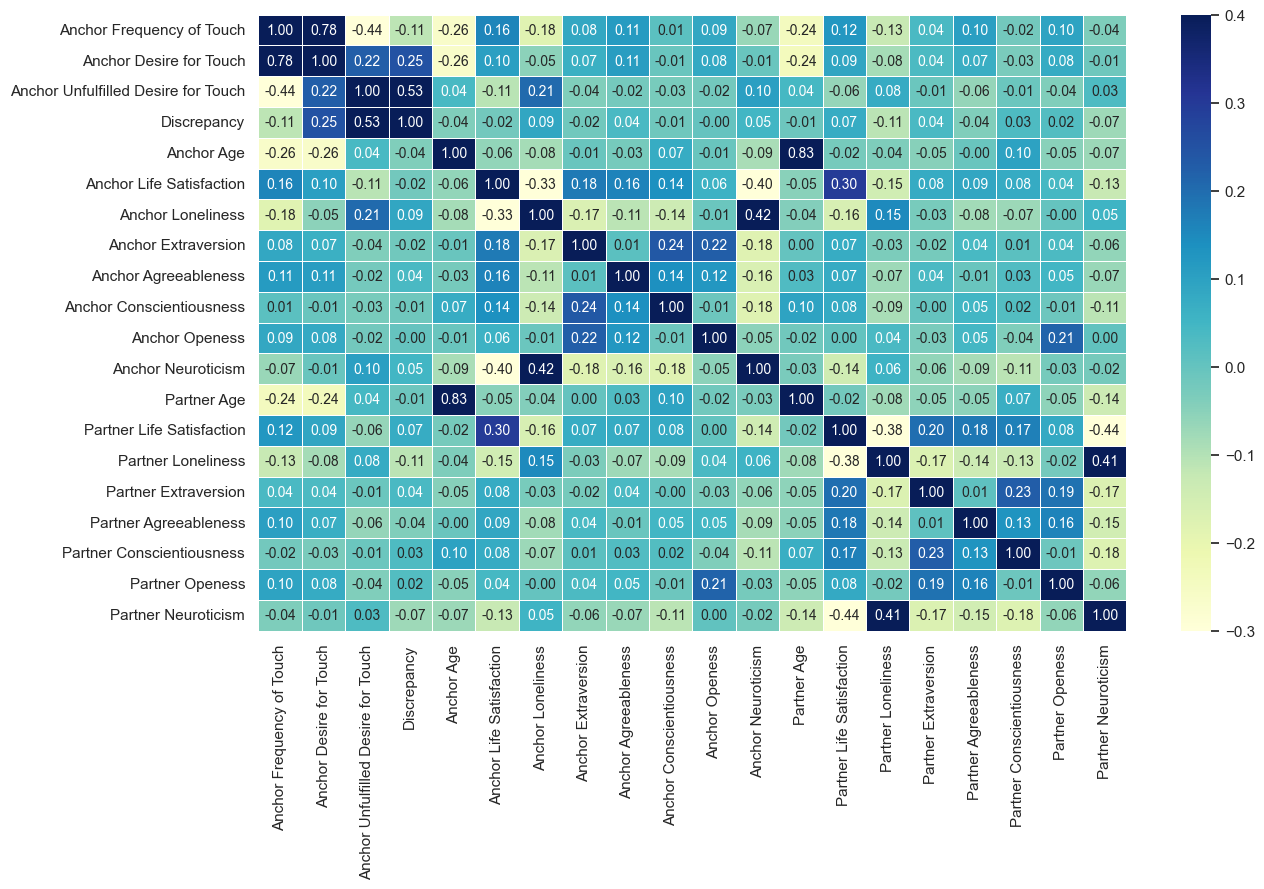

In [120]:
plt.figure(figsize=(14, 8))
plt.tight_layout()

correlation = df[
    individual_factors
].corr()

matrix = np.triu(correlation)

annot_mask = correlation <= -0.4

sns.heatmap(correlation, cmap='YlGnBu', fmt='.2f',
            linewidths=0.5, vmax=0.4, vmin=-0.3, annot_kws={"size": 10},
            annot=True,
            # annot=annot_mask,
            # mask=matrix
            )

plt.grid(False)
#TODO: ADD discrepancy instead of PARTNER
# plt.title('Moderators of touch behavior, wanting and deprivation')
plt.savefig('output/img/correlation/individual_factors.png', dpi=350, transparent=True, bbox_inches='tight')

In [84]:
pvalues = df[individual_factors].corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(
    len(df[individual_factors].columns))
plt.figure(figsize=(14, 8))
plt.tight_layout()
sns.heatmap(pvalues, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5, vmax=1, vmin=-1, annot_kws={"size": 10})

KeyError: "['Discrepancy'] not in index"

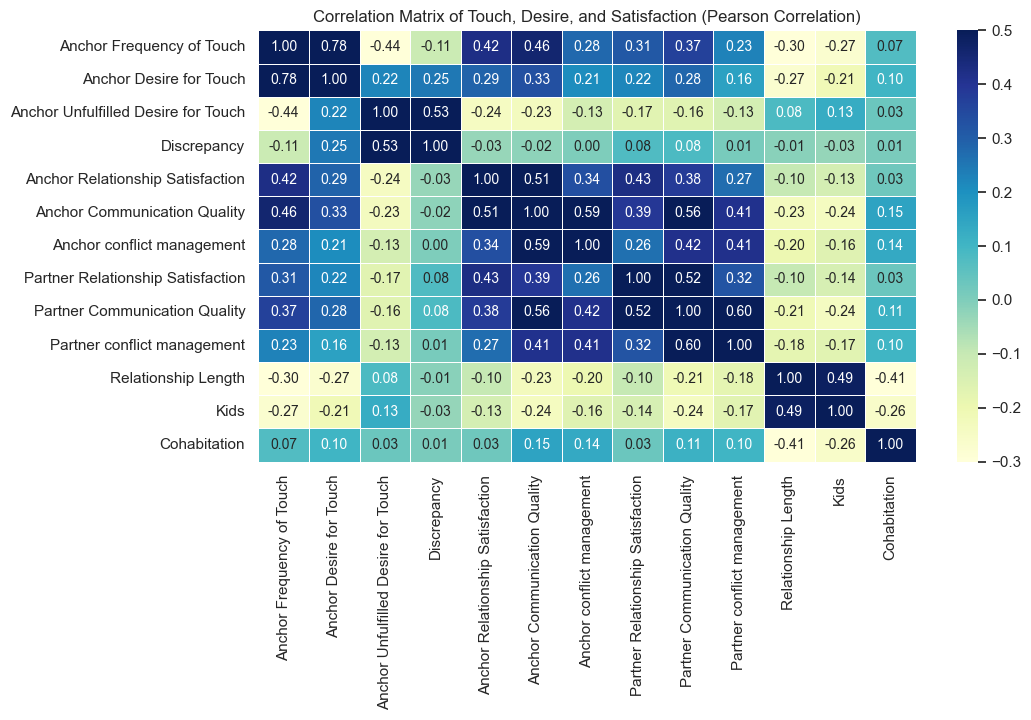

In [121]:
plt.figure(figsize=(10.6, 5.6))
plt.tight_layout()

correlation = df[
    relationship_factors
].corr()

matrix = np.triu(correlation)

annot_mask = correlation <= -0.4

sns.heatmap(correlation, cmap='YlGnBu', fmt='.2f',
            linewidths=0.5, vmax=0.5, vmin=-0.3, annot_kws={"size": 10},
            annot=True,
            # annot=annot_mask,
            # mask=matrix
            )
plt.grid(False)
plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.savefig('output/img/correlation/relationship_factors.png', dpi=350, transparent=True, bbox_inches='tight')

In [30]:
# pvalues = df[relationship_factors].corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(
#     len(df[relationship_factors].columns))
# plt.figure(figsize=(9.3, 5.3))
# plt.tight_layout()
# sns.heatmap(pvalues, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5, vmax=1, vmin=-1, annot_kws={"size": 10})

HISTOGRAM

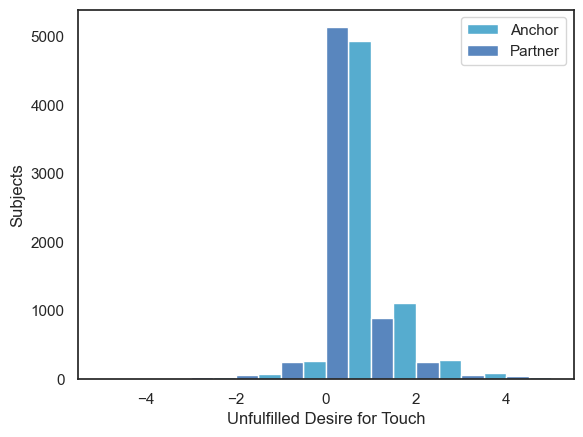

In [123]:
df_melted = df.melt(value_vars=['Anchor Unfulfilled Desire for Touch', 'Partner Unfulfilled Desire for Touch'],
                    var_name='Source', value_name='Value')

sns.histplot(data=df_melted, x='Value', hue='Source',
             element='bars',
             binwidth=1,
             palette=['#225ea8', '#1d91c0'],
             common_norm=False,
             multiple="dodge",
             )
plt.grid(False)
plt.legend(loc='upper right', labels=["Anchor", "Partner"])
plt.xlabel("Unfulfilled Desire for Touch")
plt.ylabel("Subjects")
plt.savefig('output/img/Deficit_histogram.png', dpi=350, transparent=True)

In [32]:
fig_names = ['Anchor overall touch', 'Partner overall touch',
             'Anchor kiss touch', 'Partner kiss touch',
             'Anchor hold touch', 'Partner hold touch',
             'Anchor hug touch', 'Partner hug touch'
             ]

lines_w = 3

for i, name in enumerate(fig_names):
    ax = None
    ax1 = None

    ax = sns.barplot(frequency_map[vars[i]],
                     linewidth=lines_w,
                     edgecolor=colors,
                     facecolor=(0, 0, 0, 0)
                     )
    for bar in ax.patches:
        bar.set_linestyle('--')
        bar.set_linewidth(lines_w)

    ax1 = sns.barplot(frequency_map[vars[i + 1]],
                      linewidth=lines_w,
                      edgecolor=colors,
                      facecolor=(0, 0, 0, 0)
                      )

    multiplier = 0

    # for attribute, measurement in frequency_map[vars[i]].items():
    #     offset = multiplier
    #     rects = ax.bar(offset,
    #                    measurement,
    #                    label=attribute,
    #                    edgecolor=colors[multiplier],
    #                    facecolor=(0, 0, 0, 0)
    #                    )
    #     ax.bar_label(rects)
    #     multiplier += 1
    #
    # multiplier = 0
    #
    # for attribute, measurement in frequency_map[vars[i + 1]].items():
    #     offset = multiplier
    #     rects = ax1.bar(offset,
    #                     measurement,
    #                     label=attribute,
    #                     edgecolor=colors[multiplier],
    #                     facecolor=(0, 0, 0, 0))
    #     ax1.bar_label(rects, label_type='center')
    #     multiplier += 1

    plt.grid(False)
    plt.tight_layout()
    plt.ylim(0, 40)
    plt.ylabel("Percentage")
    plt.xticks(range(6), labels=labels)
    # plt.savefig('output/img/frequency/' + name + '.png', dpi=350, transparent=True, bbox_inches='tight')
    plt.close()

CORRELATION

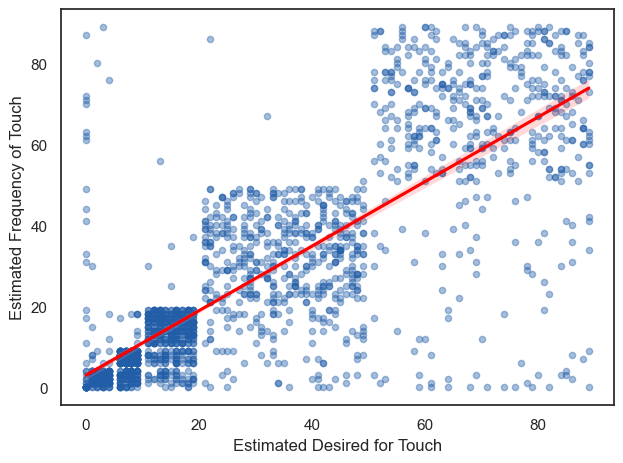

In [33]:
def map_to_random_value(response):
    if response == 0:
        return 0
    elif response == 1:
        return np.random.randint(1, 5)
    elif response == 2:
        return np.random.randint(6, 10)
    elif response == 3:
        return np.random.randint(11, 20)
    elif response == 4:
        return np.random.randint(21, 50)
    elif response == 5:
        return np.random.randint(51, 90)
    else:
        return np.nan


df["x_value"] = df["Anchor Desire for Touch"].apply(map_to_random_value)
df["y_value"] = df["Anchor Frequency of Touch"].apply(map_to_random_value)

sns.regplot(data=df, x="x_value", y="y_value",
            scatter_kws={'alpha': 0.4, 's': 20, 'color': "#225ea8"},
            line_kws={'color': 'red'},
            order=1
            # x_jitter=0.1
            )

plt.xlabel("Estimated Desired for Touch")
plt.ylabel("Estimated Frequency of Touch")

plt.tight_layout()
plt.grid(False)
plt.savefig('output/img/scatter/scatter_anchor_desvsgiv.png', dpi=350, transparent=True)

BARPLOT

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Frequency of Touch vs. 5.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.731e-11 U_stat=1.784e+04
1.0_Anchor Desire for Touch vs. 5.0_Anchor Desire for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:7.670e-11 U_stat=1.628e+04


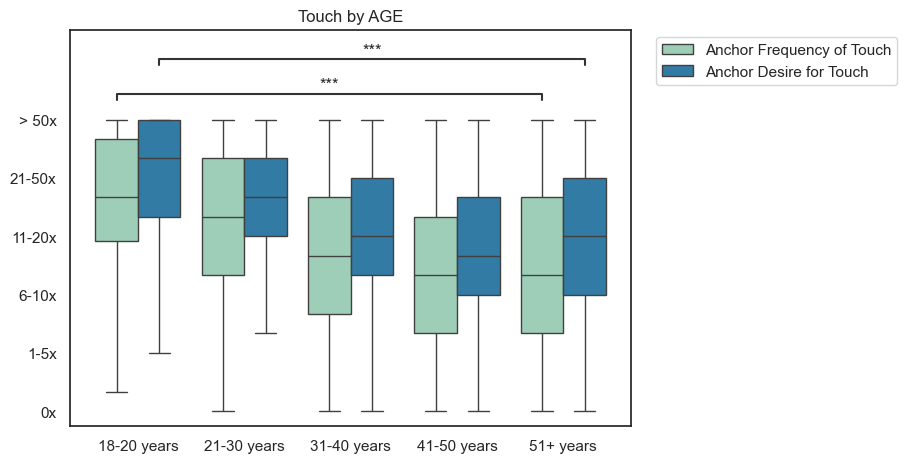

In [34]:
df1 = df.melt(id_vars='Anchor Age group',
              value_vars=['Anchor Frequency of Touch', 'Anchor Desire for Touch'],
              var_name='Touch index', value_name='Touch Freq'
              )
pairs = [
    ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
    ((1, "Anchor Desire for Touch"), (5, "Anchor Desire for Touch")),
]

x = "Anchor Age group"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Desire for Touch']

ax = sns.boxplot(data=df1, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df1, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.title("Touch by AGE")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["18-20 years", "21-30 years", "31-40 years", "41-50 years", "51+ years"])
plt.savefig('output/img/comparisons/Anchor-age.png', dpi=350, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Frequency of Touch vs. 5.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.385e-08 U_stat=2.405e+05
1.0_Anchor Desire for Touch vs. 5.0_Anchor Desire for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:6.462e-01 U_stat=1.805e+05


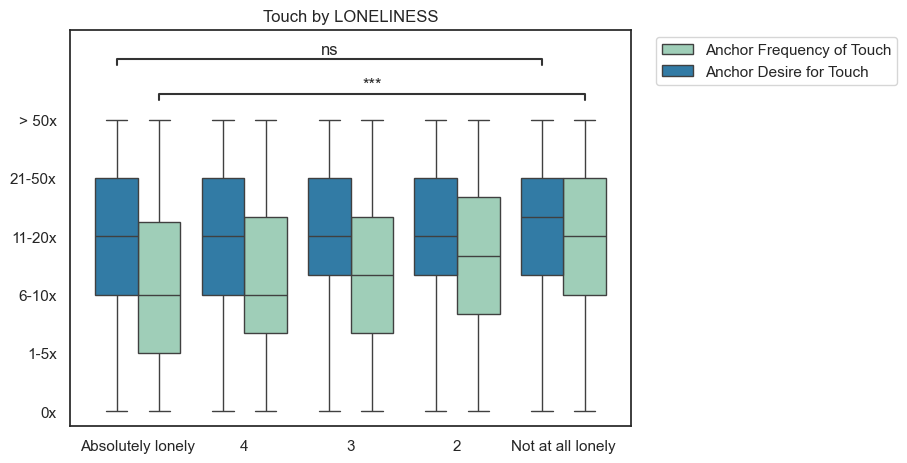

In [35]:
df1 = df.melt(id_vars='Anchor Loneliness',
              value_vars=['Anchor Frequency of Touch', 'Anchor Desire for Touch'],
              var_name='Touch index', value_name='Touch Freq'
              )
pairs = [
    ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
    ((1, "Anchor Desire for Touch"), (5, "Anchor Desire for Touch")),
]

x = "Anchor Loneliness"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Desire for Touch']

ax = sns.boxplot(data=df1, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df1, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.title("Touch by LONELINESS")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xlim(reversed(plt.xlim()))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
plt.savefig('output/img/comparisons/Anchor-loneliness.png', dpi=350, transparent=True, bbox_inches='tight')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Frequency of Touch vs. 5.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.817e-75 U_stat=5.829e+05
1.0_Anchor Desire for Touch vs. 5.0_Anchor Desire for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.154e-68 U_stat=5.341e+05


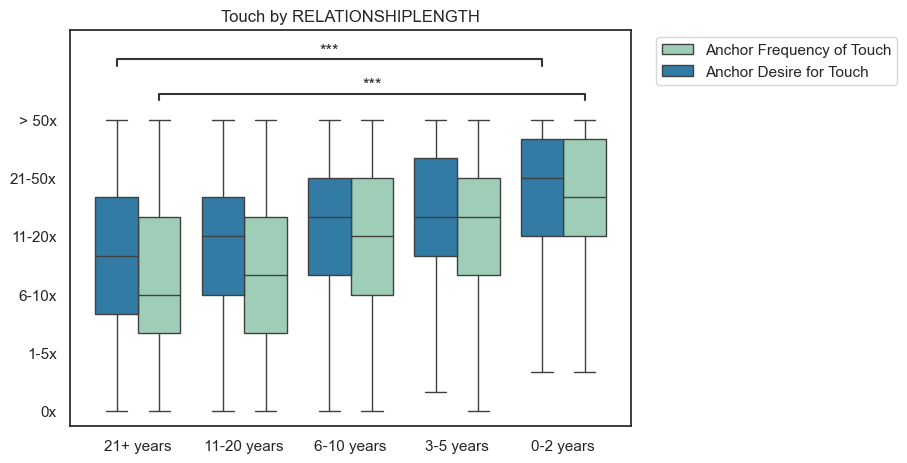

In [36]:
touching = df.melt(id_vars='Relationship Length',
                   value_vars=['Anchor Frequency of Touch', 'Anchor Desire for Touch',
                               'Partner Frequency of Touch',
                               'Partner Desire for Touch'],
                   var_name='Touch index', value_name='Touch Freq'
                   )

x = "Relationship Length"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Desire for Touch']
pairs = [
    ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
    ((1, "Anchor Desire for Touch"), (5, "Anchor Desire for Touch")),
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.title("Touch by RELATIONSHIPLENGTH")
plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.savefig("output/img/comparisons/Anchor-relationlength.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Frequency of Touch vs. 5.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.754e-21 U_stat=1.382e+03
1.0_Anchor Desire for Touch vs. 5.0_Anchor Desire for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.358e-13 U_stat=2.544e+03


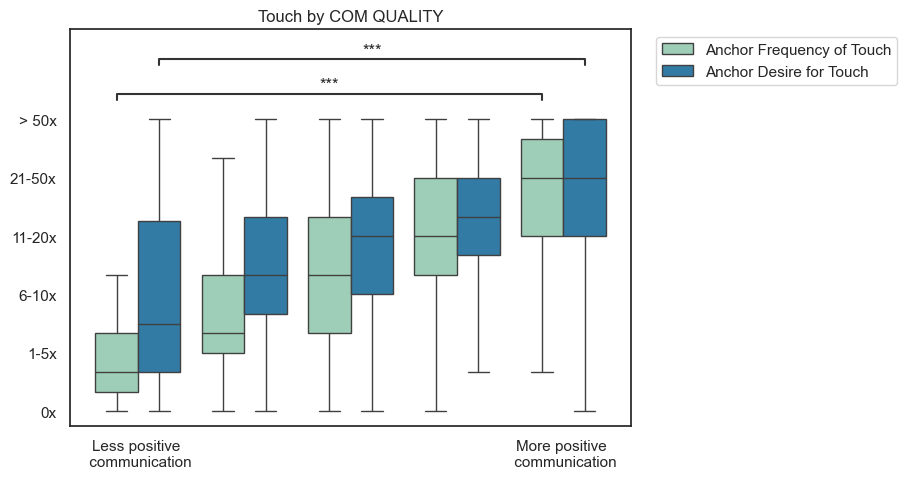

In [85]:
for i in range(0, len(df)):
    if df['Anchor Communication Quality'][i] <= 12:
        df.loc[i, 'Anchor comm'] = 1
    elif 12 < df['Anchor Communication Quality'][i] <= 17:
        df.loc[i, 'Anchor comm'] = 2
    elif 17 < df['Anchor Communication Quality'][i] <= 22:
        df.loc[i, 'Anchor comm'] = 3
    elif 22 < df['Anchor Communication Quality'][i] <= 26:
        df.loc[i, 'Anchor comm'] = 4
    elif 27 < df['Anchor Communication Quality'][i]:
        df.loc[i, 'Anchor comm'] = 5

touching = df.melt(id_vars='Anchor comm',
                   value_vars=['Anchor Frequency of Touch', 'Anchor Desire for Touch',
                               'Partner Frequency of Touch',
                               'Partner Desire for Touch'],
                   var_name='Touch index', value_name='Touch Freq'
                   )

x = "Anchor comm"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Desire for Touch']
pairs = [
    ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
    ((1, "Anchor Desire for Touch"), (5, "Anchor Desire for Touch")),
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.title("Touch by COM QUALITY")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=["Less positive \n communication", "", "", "", "More positive \n communication"])
plt.savefig("output/img/comparisons/Anchor-communication.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Anchor Frequency of Touch vs. 3.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.915e-50 U_stat=1.255e+06
0.0_Anchor Desire for Touch vs. 3.0_Anchor Desire for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:5.802e-31 U_stat=1.126e+06


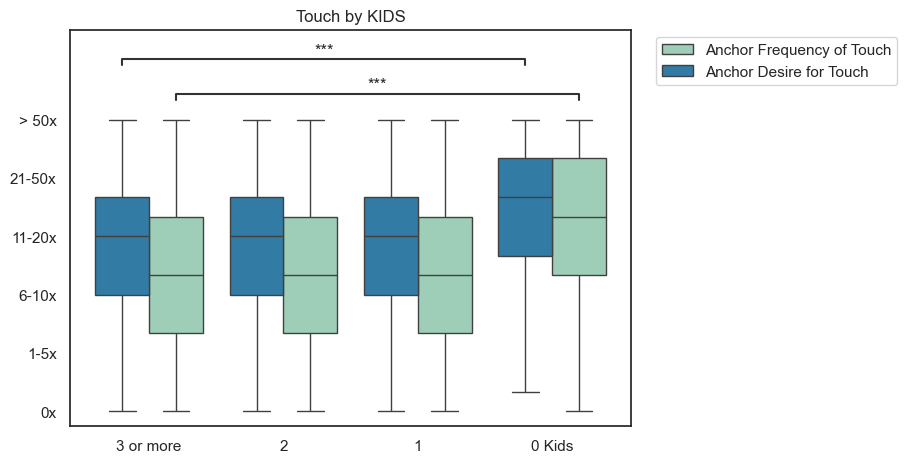

In [86]:
touching = df.melt(id_vars='Kids',
                   value_vars=['Anchor Frequency of Touch', 'Anchor Desire for Touch',
                               'Partner Frequency of Touch',
                               'Partner Desire for Touch'],
                   var_name='Touch index', value_name='Touch Freq'
                   )

x = "Kids"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Desire for Touch']
pairs = [
    ((0, "Anchor Frequency of Touch"), (3, "Anchor Frequency of Touch")),
    ((0, "Anchor Desire for Touch"), (3, "Anchor Desire for Touch")),
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.title("Touch by KIDS")
plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
plt.savefig("output/img/comparisons/Anchor-kids.png", dpi=350, transparent=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Anchor Frequency of Touch vs. 10.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.789e-04 U_stat=3.185e+02
0.0_Anchor Desire for Touch vs. 10.0_Anchor Desire for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.614e-03 U_stat=2.845e+03


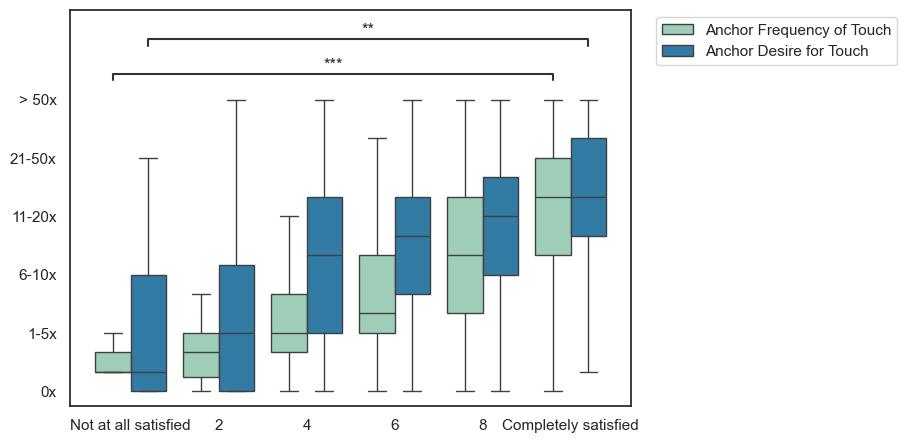

In [87]:
touching = df.melt(id_vars='Anchor Relationship Satisfaction',
                   value_vars=['Anchor Frequency of Touch', 'Anchor Desire for Touch',
                               'Partner Frequency of Touch',
                               'Partner Desire for Touch'],
                   var_name='Touch index', value_name='Touch Freq'
                   )

x = "Anchor Relationship Satisfaction"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Desire for Touch']
pairs = [
    ((0, "Anchor Frequency of Touch"), (10, "Anchor Frequency of Touch")),
    ((0, "Anchor Desire for Touch"), (10, "Anchor Desire for Touch")),
]
ax = sns.boxplot(data=touching, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=touching, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
plt.savefig("output/img/comparisons/Anchor-relationsat.png", dpi=350, transparent=True)

KDE

<Figure size 1400x800 with 0 Axes>

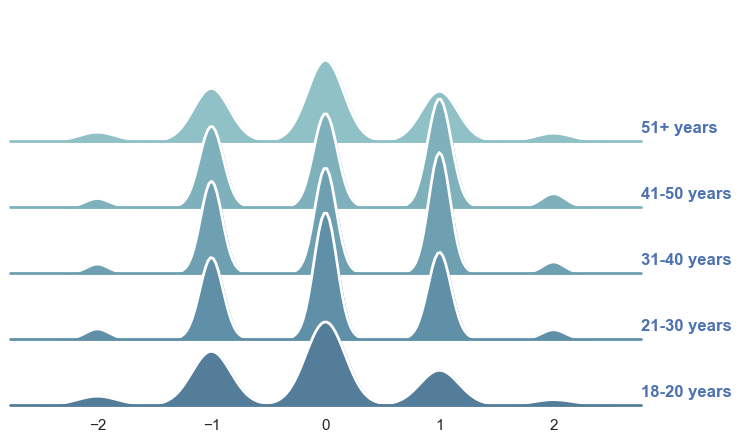

In [40]:
plt.figure(figsize=(14, 8))
duration_options = {
    1: '18-20 years',
    2: '21-30 years',
    3: '31-40 years',
    4: '41-50 years',
    5: '51+ years'
}

df['text Relationship'] = df['Anchor Age group'].map(duration_options)

a = 'text Relationship'

df = df.sort_values(
    by="Anchor Age group",
    ascending=False
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           #  labels=["My Partner\n wants a lot \nmore touch \nthan I",
           #         "My Partner\n wants more \ntouch \nthan I",
           #         "I want the\n same amount \nof touch \nas my partner",
           #         "I want \nmore touch \nthan \nmy partner",
           #         "I want a \nlot more \ntouch than \nmy partner"
           #         ],
           )
plt.savefig("output/img/KDE_linear_age.png", dpi=350, transparent=True)

<Figure size 1400x800 with 0 Axes>

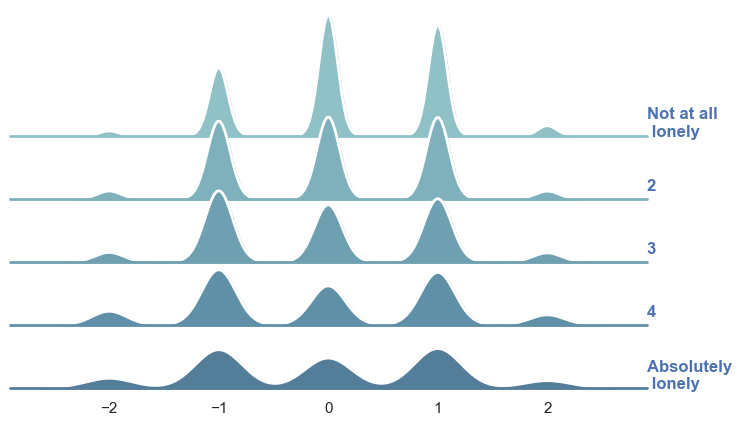

In [41]:
plt.figure(figsize=(14, 8))
duration_options = {
    1: 'Not at all\n lonely',
    2: '2',
    3: '3',
    4: '4',
    5: 'Absolutely\n lonely'
}

df['text Relationship'] = df['Anchor Loneliness'].map(duration_options)

a = 'text Relationship'

df = df.sort_values(
    by="Anchor Loneliness",
    ascending=True
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner\n wants a lot \nmore touch \nthan I",
           #         "My Partner\n wants more \ntouch \nthan I",
           #         "I want the\n same amount \nof touch \nas my partner",
           #         "I want \nmore touch \nthan \nmy partner",
           #         "I want a \nlot more \ntouch than \nmy partner"
           #         ],
           )
plt.savefig("output/img/KDE_linear_loneliness.png", dpi=350, transparent=True)

<Figure size 1400x800 with 0 Axes>

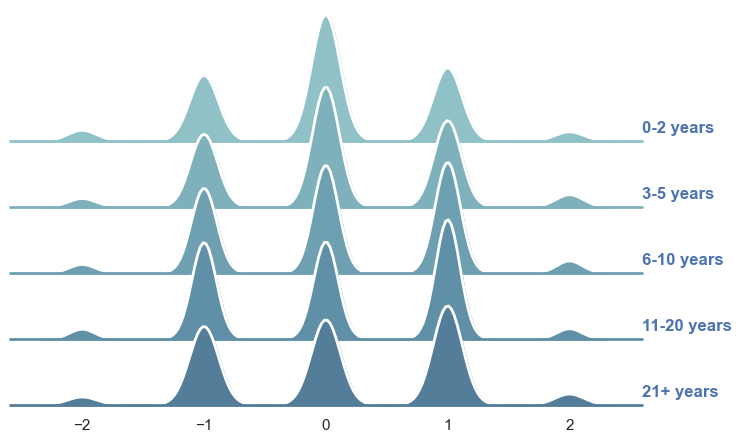

In [42]:
plt.figure(figsize=(14, 8))
duration_options = {
    1: '0-2 years',
    2: '3-5 years',
    3: '6-10 years',
    4: '11-20 years',
    5: '21+ years'
}

df['text Relationship'] = df['Relationship Length'].map(duration_options)

a = 'text Relationship'

df = df.sort_values(
    by="Relationship Length",
    ascending=True
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner wants \na lot more\n touch than I",
           #         "My Partner \nwants more \ntouch than I",
           #         "I want the same \namount of touch \nas my partner",
           #         "I want more \ntouch than \nmy partner",
           #         "I want a lot \n more touch \nthan my partner"
           #         ],
           )
plt.savefig("output/img/KDE_linear.png", dpi=350, transparent=True)

<Figure size 1400x800 with 0 Axes>

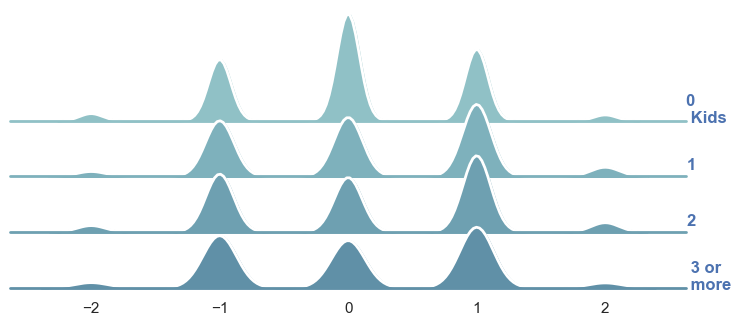

In [43]:
plt.figure(figsize=(14, 8))
duration_options = {
    0: '0 \n Kids',
    1: '1',
    2: '2',
    3: ' 3 or \n more',
}

df['text Relationship'] = df['Kids'].map(duration_options)

a = 'text Relationship'

df = df.sort_values(
    by="Kids",
    ascending=True
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner wants \na lot more\n touch than I",
           #         "My Partner \nwants more \ntouch than I",
           #         "I want the same \namount of touch \nas my partner",
           #         "I want more \ntouch than \nmy partner",
           #         "I want a lot \n more touch \nthan my partner"
           #         ],
           )
plt.savefig("output/img/KDE_linear-kids.png", dpi=350, transparent=True)

<Figure size 1400x800 with 0 Axes>

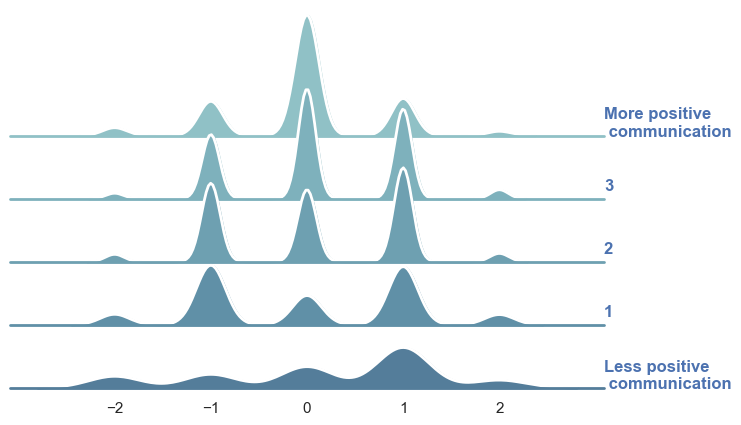

In [44]:
plt.figure(figsize=(14, 8))
duration_options = {
    1: 'Less positive \n communication',
    2: '1',
    3: '2',
    4: '3',
    5: "More positive \n communication"
}
df['text Relationship'] = df['Anchor comm'].map(duration_options)

a = 'text Relationship'

df = df.sort_values(
    by="Anchor comm",
    ascending=False
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner wants \na lot more\n touch than I",
           #         "My Partner \nwants more \ntouch than I",
           #         "I want the same \namount of touch \nas my partner",
           #         "I want more \ntouch than \nmy partner",
           #         "I want a lot \n more touch \nthan my partner"
           #         ],
           )
plt.savefig("output/img/KDE_linear-com.png", dpi=350, transparent=True)

In [ ]:
plt.figure(figsize=(14, 8))
duration_options = {
    0: 'Not at all\n satisfied',
    2: '2',
    4: '4',
    6: '6',
    8: '8',
    10: 'Completely\n satisfied'
}
df['text Relationship'] = df['Anchor Relationship Satisfaction'].map(duration_options)

a = 'text Relationship'

df = df.sort_values(
    by="Anchor Relationship Satisfaction",
    ascending=False
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner wants \na lot more\n touch than I",
           #         "My Partner \nwants more \ntouch than I",
           #         "I want the same \namount of touch \nas my partner",
           #         "I want more \ntouch than \nmy partner",
           #         "I want a lot \n more touch \nthan my partner"
           #         ],
           )
plt.savefig("output/img/KDE_linear-relsat.png", dpi=350, transparent=True)

In [ ]:
# sns.boxplot(data=df,
#             x="Relationship Length",
#             y="Anchor Unfulfilled Desire for Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
# # plt.savefig("output/img/comparisons/Anchor-rel-len-deficit.png", dpi=350, transparent=True)

In [ ]:
# sns.boxplot(data=df,
#             x="Anchor Loneliness",
#             y="Anchor Unfulfilled Desire for Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img/comparisons/Anchor-Loneliness.png", dpi=350, transparent=True)

In [ ]:
# sns.boxplot(data=df,
#             x="Partner Loneliness",
#             y="Partner Unfulfilled Desire for Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# #plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img/comparisons/Partner-Loneliness.png", dpi=350, transparent=True)

In [ ]:
# sns.boxplot(data=df,
#             x="Anchor Relationship Satisfaction",
#             y="Anchor Unfulfilled Desire for Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.savefig("output/img/comparisons/Anchor-rel-sat-deficit.png", dpi=350, transparent=True)

In [ ]:
# Following "User's guide to correlation coefficients" (https://pmc.ncbi.nlm.nih.gov/articles/PMC6107969/)

In [ ]:
 # sns.boxplot(data=df,
#             x="Kids",
#             y="Anchor Unfulfilled Desire for Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
# plt.savefig("output/img/comparisons/Anchor-kids-deficit.png", dpi=350, transparent=True)

In [ ]:
# sns.boxplot(data=df,
#             x="Anchor Life Satisfaction",
#             y="Anchor Unfulfilled Desire for Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])

# plt.savefig("output/img/comparisons/Anchor-life-sat-deficit.png", dpi=350, transparent=True)

<Figure size 1400x800 with 0 Axes>

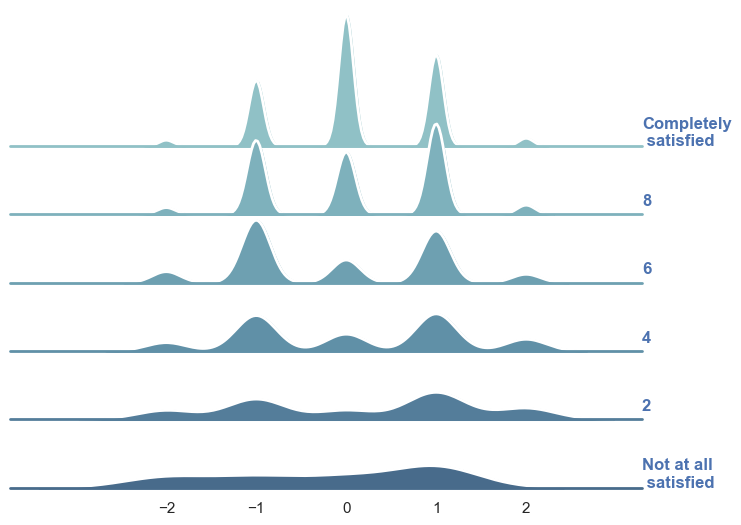

In [45]:
# sns.boxplot(data=df,
#             x="Anchor comm",
#             y="Anchor Unfulfilled Desire for Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4],
#            labels=["Less positive \n communication", "", "", "", "More positive \n communication"])

# plt.savefig("output/img/comparisons/Anchor-com-deficit.png", dpi=350, transparent=True)